In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rc('font', size=14)

In [5]:
dataset = 'mnist'
# dataset = 'fashion'

In [6]:
fedavg_loss = np.load(f'./{dataset}/qFedAvg/train_loss.npy')
fedavg_acc = np.load(f'./{dataset}/qFedAvg/train_acc.npy')
central_loss = np.load(f'./{dataset}/central/train_loss.npy')
central_acc = np.load(f'./{dataset}/central/train_acc.npy')

qfedinf_loss = np.load(f'./{dataset}/qFedInf/test_loss.npy')
qfedinf_acc = np.load(f'./{dataset}/qFedInf/test_acc.npy')

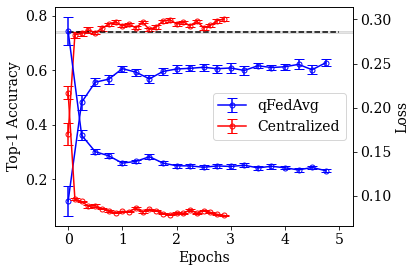

In [7]:
plt.errorbar(np.arange(fedavg_acc.shape[1])/4, np.mean(fedavg_acc, axis=0), yerr=np.std(fedavg_acc, axis=0), label='qFedAvg', marker='o', ms=5, mfc='none', capsize=5, color='blue')
plt.errorbar(np.arange(central_acc.shape[1])/8, np.mean(central_acc, axis=0), yerr=np.std(central_acc, axis=0), label='Centralized', marker='o', ms=5, mfc='none', capsize=5, color='red')
plt.hlines(np.mean(qfedinf_acc), 0, 5, linestyles='dashed', colors='black')
plt.axhspan(np.mean(qfedinf_acc) - np.std(qfedinf_acc), np.mean(qfedinf_acc) + np.std(qfedinf_acc), color='gray', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Top-1 Accuracy')
plt.twinx()
plt.errorbar(np.arange(fedavg_loss.shape[1])/4, np.mean(fedavg_loss, axis=0), yerr=np.std(fedavg_loss, axis=0), label='qFedAvg', marker='o', ms=5, mfc='none', capsize=5, color='blue')
plt.errorbar(np.arange(central_loss.shape[1])/8, np.mean(central_loss, axis=0), yerr=np.std(central_loss, axis=0), label='Centralized', marker='o', ms=5, mfc='none', capsize=5, color='red')
# plt.hlines(np.mean(qfedinf_loss), 0, 5, linestyles='dashed', colors='black', label='qFedInf')
# plt.axhspan(np.mean(qfedinf_loss) - np.std(qfedinf_loss), np.mean(qfedinf_loss) + np.std(qfedinf_loss), color='gray', alpha=0.2)
plt.xticks(np.arange(6))
plt.legend(loc='center right')
plt.ylabel('Loss')
plt.tight_layout()
plt.savefig(f'./{dataset}/cent_fedavg.pdf')
plt.show()